Code exercise for DBSCAN algorithm, following example on [this blog post](http://mccormickml.com/2016/11/08/dbscan-clustering/) and [this blog post](https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d)

In [20]:
# codes for the algorithm

class DBSCAN:

    # initialize ojbect and bind parameters
    def __init__(self, eps=0.5, minpts=5):
        self.eps = eps
        self.minpts = minpts
    
    # method to find neighbor points for a paricular points 
    def regionQuery(self, X, p):
        # initilize list for inedex of neighbors
        neighbors = []
        # for each point in the training set, check the Euclidean distance between it and the selected points
        # if distance is smaller than eps, add it to the neighbor list
        for idx in range(0, len(X)):
            if np.linalg.norm(X[p] - X[idx]) < self.eps:
                neighbors.append(idx)
        
        return neighbors
    
    
    # method to "grow cluster" - find points that belong to the same cluster
    def growCluster(self, X, labels, p, C):
        
        # create a list that holds all points that belong to the same cluster
        # the list starts off with only one point, which is seed point of the cluster
        queue = [p]
        
        # for each point in the queue, check whether it's a branch or a leaf
        # if brach, add their unclaimed neighbors to the queue
        i = 0
        while i < len(queue):
            # pick the next point from the queque
            pt = queue[i]
            # find neighors for that point
            neighborPts = self.regionQuery(X, pt)
            
            # if the number of neighbors is fewer than the threshold
            # then the point is a leaf point, and move onto the next point
            if len(neighborPts) < self.minpts:
                i += 1
                continue
            
            # otherwise the point is a brach point
            # in that case, for each sub point in that branch
            for pn in neighborPts:
                
                # if the sub point was previously labeled as noise, update that label to the current cluster
                if labels[pn] ==  -1:
                    labels[pn] = C
                # or if the sub point hasn't been visited, assign current cluster to the point    
                elif labels[pn] == 0:
                    labels[pn] = C
                    # also add the sub point to the queue
                    queue.append(pn)
            
            # move to the next point
            i += 1
            
    # main method for the clustering algorithm
    def fit(self, X):
        n = len(X)
        
        # initilize id for the current cluster C
        # C = 0 means unvisited points
        # C = -1 means noise points
        C = 0
        
        # initialize labels
        labels = np.zeros(n)

        # outer loop iterate through each point in the dataset
        for p in range(0, n):
            # check if the current point has been visited or not. pass if the point has been visited
            if labels[p] != 0:
                continue
            
            # if the current point hasn't been visited, run the regionQuery method to find its neighors
            neighbors = self.regionQuery(X, p)
            
            # check if the number of neighbors is smaller than the minpts threshold
            # if yes, assign -1 label to the point for noise
            if len(neighbors) < self.minpts:
                labels[p] =  -1
            # otherwise assign the next label to the point
            # and run the growCluster method to find all points that belong to the same cluster
            else:
                C += 1
                labels[p] = C
                self.growCluster(X, labels, p, C)
        
        return labels

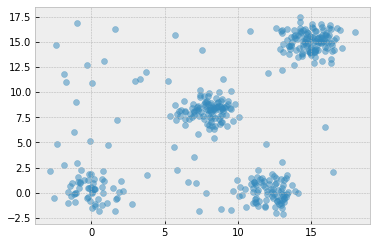

In [21]:
# generate test data

def generateData():
    x1=np.random.randn(50,2)
    x2x=np.random.randn(80,1)+12
    x2y=np.random.randn(80,1)
    x2=np.column_stack((x2x,x2y))
    x3=np.random.randn(100,2)+8
    x4=np.random.randn(120,2)+15
    z=np.concatenate((x1,x2,x3,x4))
    return z

data = generateData()
noise = np.random.rand(50, 2)*20 - 3
data_full = np.concatenate((data, noise))
plt.scatter(data_full[:, 0], data_full[:, 1], alpha=.5)

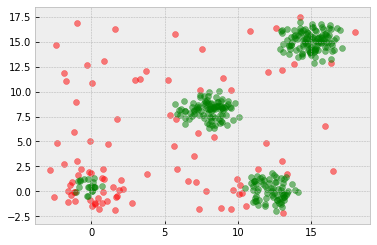

In [30]:
# test algorithm performance

dbs = DBSCAN(eps=1, minpts=20)
labels = dbs.fit(data_full)
plt.scatter(data_full[labels==-1, 0], data_full[labels==-1, 1], color='red', alpha=0.5)
plt.scatter(data_full[labels>=0, 0], data_full[labels>=0, 1], color='green', alpha=0.5)